# Telecom Customer Churn Analyse

Customer churn (Kundenabwanderung) ist ein allgegenwärtiges Problem für Unternehmen. Um diesem Phänomen entgegenzuwirken ist es wichtig zu verstehen, warum Kunden das Unternehmen verlassen. Denn wenn wir diese Zusammenhänge verstehen, dann können wir Vorhersagen für die Zukunft treffen und potentielle Abwanderungen erkennen. So können Abwanderungsgefährdeten Kunden beispielsweise Rabattangebote unterbreitet werden, um sie weiterhin als Kunde zu behalten. 

In diesem Beispiel analysieren wir Kundendaten eines Telekommunikationsunternehmens. Der volle Datensatz ist auf Kaggle zu finden: https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
# Laden der Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt

# Grafikstil und Optionen setzen
sns.set(style = 'white')
pd.set_option('display.max_columns', None)
%matplotlib inline

**Einlesen der Daten**

In [2]:
data = pd.read_csv('Telco-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
# Überprüfen der Datentypen
data.dtypes
# TotalCharges wird nicht als numerisch gesehen

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Konvertieren von TotalCharges zu numerisch
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [7]:
data.isnull().mean()

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [8]:
# Nur 0.1562% der Personen enthalten einen fehlenden Wert, weswegen sich Zeilen löschen anbietet.
data.dropna(inplace = True)

In [9]:
# customerID ist kein sinnvolles Vorhersage feature.
df = data.drop(columns="customerID")

In [10]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
# Umkodieren der Churn Variable von Ja/Nein auf 1/0
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [12]:
# Dummies der kategorischen Variablen erstellen für die späteren Modelle (aka one-hot-encoding)
df_dummies = pd.get_dummies(df)

In [13]:
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


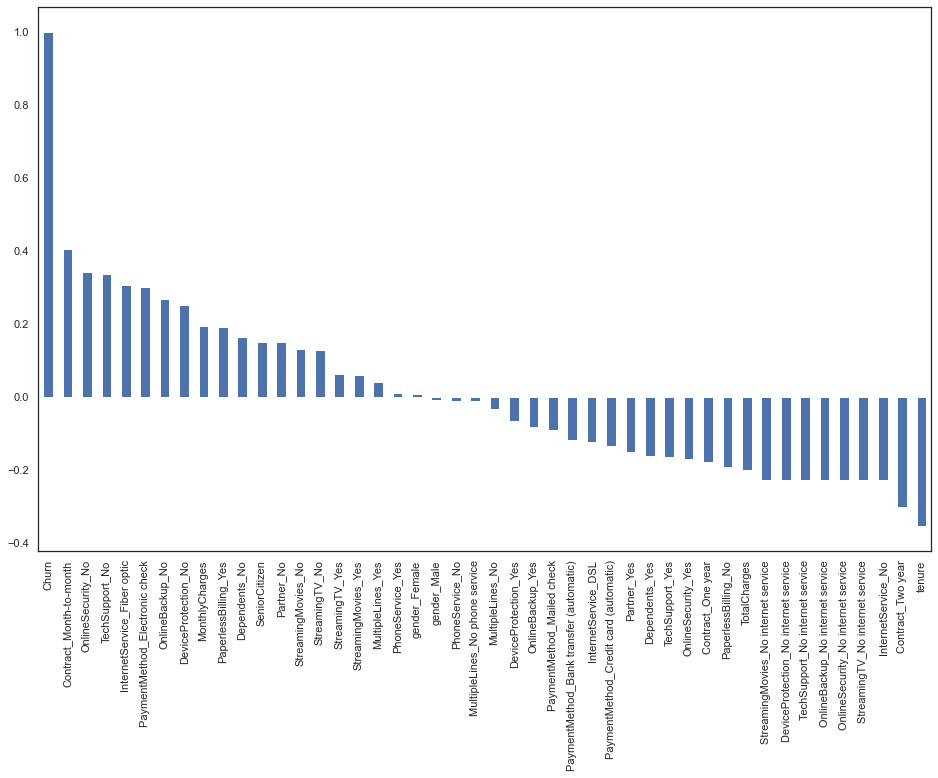

In [14]:
# Korrelationsplot
plt.figure(figsize=(16,10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Monatliche Verträge haben die höchste positive Korrelation mit Churn und die länge der Kundenbeziehung hat die höchste negative Korrelation.


## Datenexploration

**Churn**
26,6% der Kunden haben das Unternehmen innerhalb von 3 Monaten nach dem Sammeln der Originaldaten verlassen.

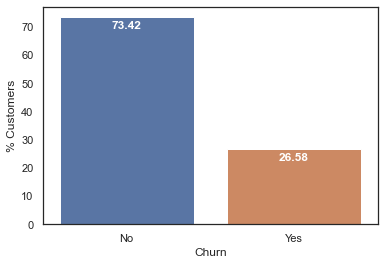

In [15]:
ax = sns.barplot(x="Churn", y="Churn", data=data, estimator=lambda x: len(x) / len(df) * 100, orient="v")
ax.set_ylabel('% Customers')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height - 4,
            '{:1.2f}'.format(height),
            fontsize=12,
            color='white',
            weight = 'bold',
            ha="center") 

**Gender**

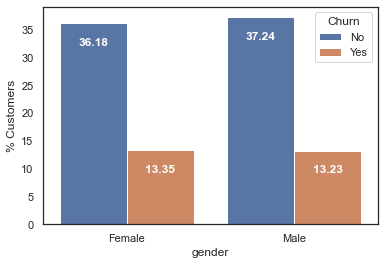

In [16]:
# Kaum Geschlechtsunterschiede zu erkennen
ax = sns.barplot(x="gender", y="gender", hue="Churn", data=data, estimator=lambda x: len(x) / len(df) * 100, orient="v")
ax.set_ylabel('% Customers')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height - 4,
            '{:1.2f}'.format(height),
            fontsize=12,
            color='white',
            weight = 'bold',
            ha="center") 

**Senior Citizens**


Text(0.5, 1.0, '% of Senior Citizens')

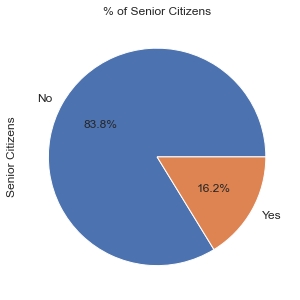

In [17]:
ax = (data['SeniorCitizen'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],
                                                                      figsize =(5,5), fontsize = 12)                                                                           
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

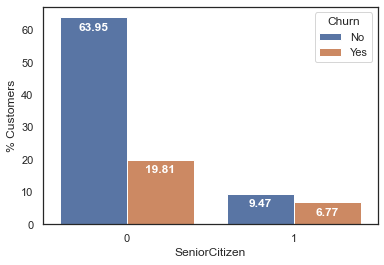

In [18]:
ax = sns.barplot(x="SeniorCitizen", y="SeniorCitizen", hue="Churn", data=data, estimator=lambda x: len(x) / len(df) * 100, orient="v")
ax.set_ylabel('% Customers')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height - 4,
            '{:1.2f}'.format(height),
            fontsize=12,
            color='white',
            weight = 'bold',
            ha="center") 

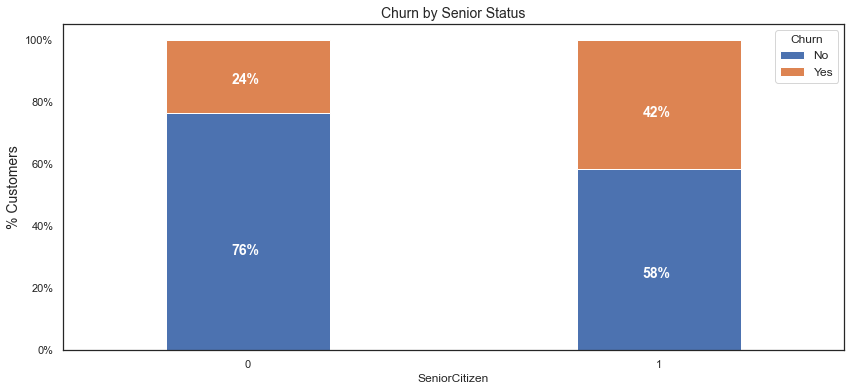

In [19]:
# Senioren sind zwar eine kleine Gruppe unter den Kunden, aber sie verlassen das Unternehmen mit erhöhter Wahrscheinlichkeit
colors = sns.color_palette()
contract_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.4, 
                                                              stacked = True, rot = 0, figsize = (14,6),color = colors)

ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
ax.legend(loc='best',prop={'size':12},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Senior Status',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.40*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**Partner and dependent status** 

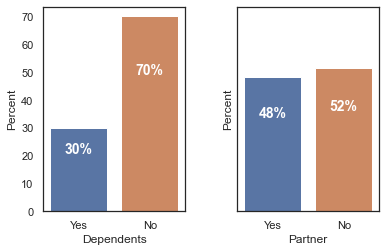

In [20]:
fig, ax = plt.subplots(1,2, sharey = True)
fig.tight_layout(pad=3.0) # add padding between subplots

sns.barplot(x="Dependents", y="Dependents", palette=sns.color_palette(), data=data, orient="v", estimator=lambda x: len(x) / len(data) * 100, ax=ax[0], order=["Yes", "No"])
ax[0].set(ylabel="Percent")
#ax[0].set_ylim([0,100])

sns.barplot(x="Partner", y="Partner", palette=sns.color_palette(), data=data, orient="v", estimator=lambda x: len(x) / len(data) * 100, ax=ax[1], order=["Yes", "No"])
ax[1].set(ylabel="Percent")
#ax[1].set_ylim([0,100])

# Code to add the data labels on the stacked bar chart
for i in [0,1]:
    for p in ax[i].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax[i].annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.7*height),
                    color = 'white',
                    weight = 'bold',
                    size = 14)

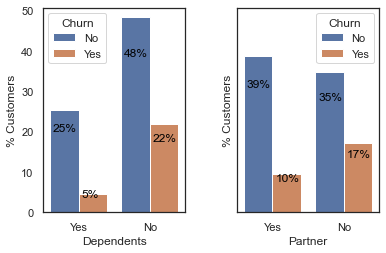

In [21]:
fig, ax = plt.subplots(1,2 , sharey = True) # why no sharey
fig.tight_layout(pad=3.0) # add padding between subplots

#plt.subplot(1, 2, 1)
ax[0]=sns.barplot(x="Dependents", y="Dependents", hue="Churn", data=data, estimator=lambda x: len(x) / len(df) * 100, orient="v", ax=ax[0], order=["Yes", "No"])
ax[0].set_ylabel('% Customers')

#plt.subplot(1, 2, 2)
ax[1]=sns.barplot(x="Partner", y="Partner", hue="Churn", data=data, estimator=lambda x: len(x) / len(df) * 100, orient="v", ax=ax[1], order=["Yes", "No"])
ax[1].set_ylabel('% Customers')

for i in [0,1]:
    for p in ax[i].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax[i].annotate('{:.0f}%'.format(height), (p.get_x()+.10*width, p.get_y()+0.8*height),
                    color = 'black',
                    size = 12)

Einen Partner oder abhängige Personen zu haben verringert die Wahrscheinlichkeit für Churn.

**Tenure**

Bei der länge der Kundenbeziehung sehen wir erhöhte Konzentrationen bei sehr kurzen Beziehungen und Beziehungen die seit Beginn bestehen.

Text(0.5, 1.0, '# of Customers by their tenure')

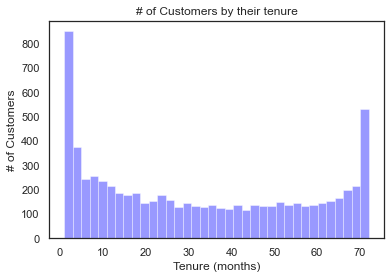

In [22]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, bins=int(180/5), color = 'blue')
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

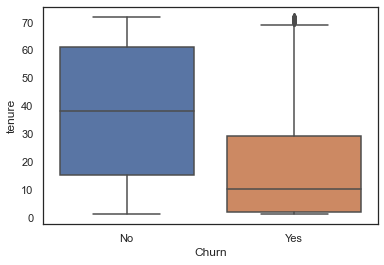

In [23]:
# Deutliche Unterschiede bei der Länge der Beziehung bezogen auf spätere Kundenabwanderung
sns.boxplot(x = data.Churn, y = data.tenure)

**Contracts**

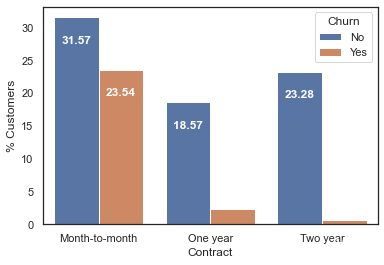

In [24]:
ax = sns.barplot(x="Contract", y="Contract", hue="Churn", data=data, estimator=lambda x: len(x) / len(df) * 100, orient="v")
ax.set_ylabel('% Customers')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height - 4,
            '{:1.2f}'.format(height),
            fontsize=12,
            color='white',
            weight = 'bold',
            ha="center") 

It is fair to assume that tenure is related to contract type.

Text(0.5, 1.0, 'Two Year Contract')

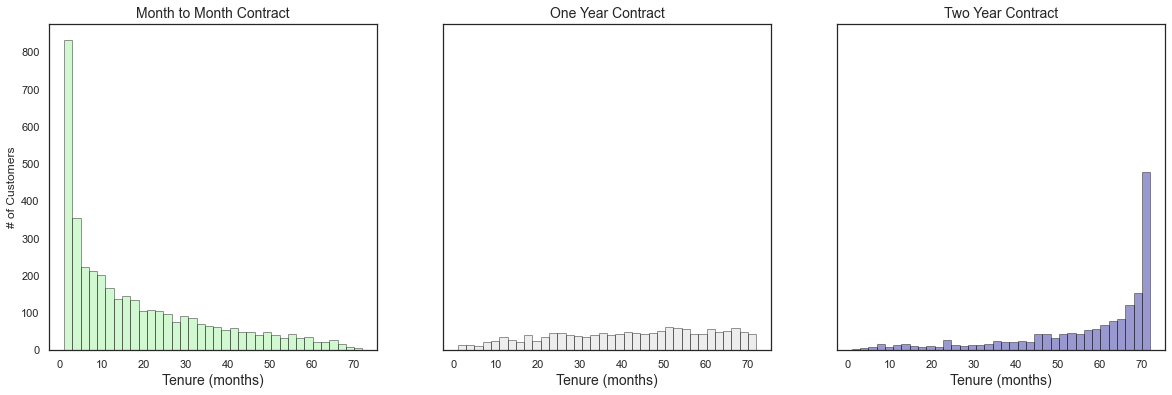

In [25]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'lightgreen',
                   hist_kws={'edgecolor':'black'}, ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)', size=14)
ax.set_title('Month to Month Contract', size=14)

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'lightgrey',
                   hist_kws={'edgecolor':'black'}, ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'}, ax=ax3)

ax.set_xlabel('Tenure (months)', size=14)
ax.set_title('Two Year Contract', size=14)

Die meisten Kunden haben einen monatliche Vertrag und nur eine kurze Verweildauer, während Personen mit 2-Jahres Verträgen häufig schon seit Beginn der Aufzeichnungen Kunden sind.

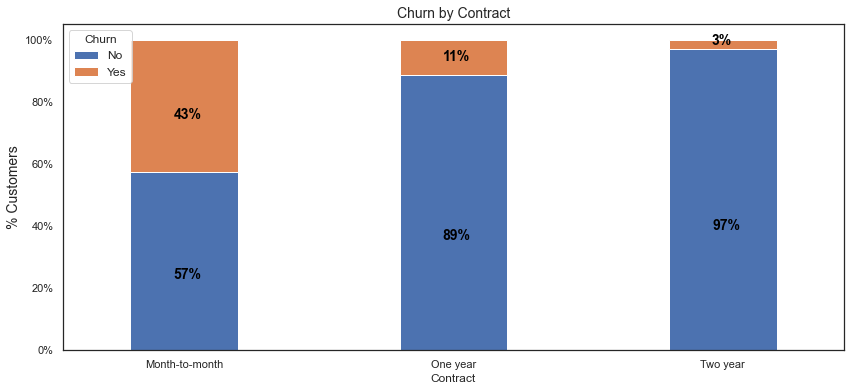

In [26]:
# Churn findet sich auch hauptsächlich in den monatlichen Verträgen
colors = sns.color_palette()
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.4, 
                                                              stacked = True, rot = 0, figsize = (14,6),color = colors)

ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
ax.legend(loc='best',prop={'size':12},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.40*width, p.get_y()+.4*height),
                color = 'black',
               weight = 'bold',
               size = 14)

**Services**

In [27]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

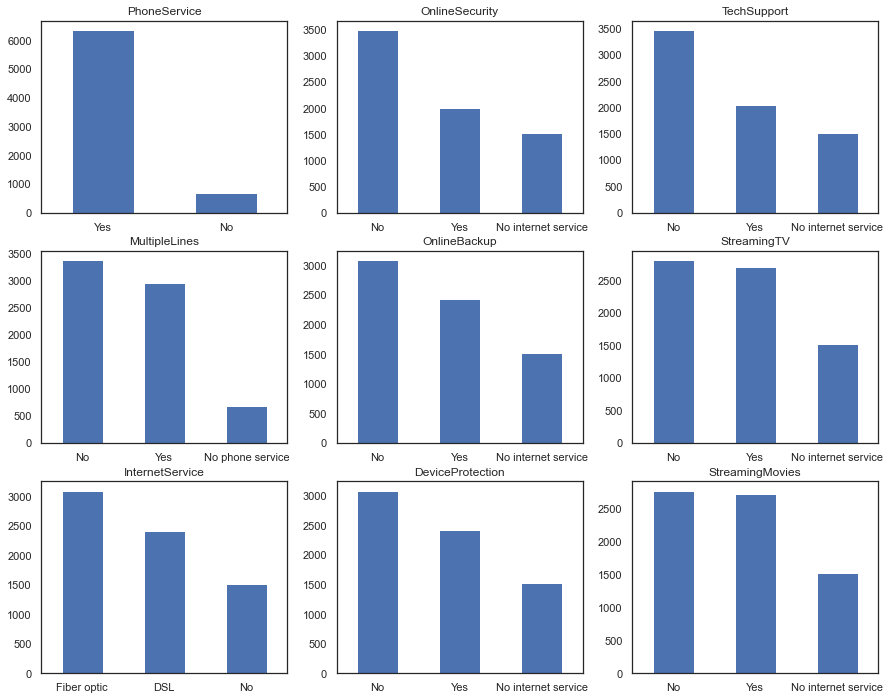

In [28]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0], rot = 0)
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

**Churn by Monthly Charges**

Text(0.5, 1.0, 'Distribution of monthly charges with churn')

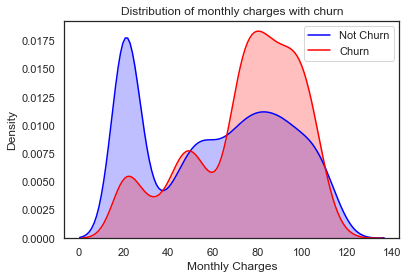

In [29]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ], color="Blue", shade = True)

ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =ax, color="Red", shade= True)

ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges with churn')

Wir sehen verschiedene Konzentrationen der monatlichen Beiträge zwischen Churn und nicht-Churn. Geringe Beiträge gibt es vor allem bei Kunden die uns erhalten bleiben und abwandernde Kunden haben ungewöhnlich häufig sehr hohe monatliche Kosten.

**Churn by Total Charges**

Text(0.5, 1.0, 'Distribution of total charges with churn')

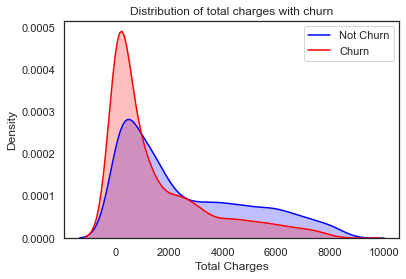

In [30]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ], color="Blue", shade = True)

ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ], ax =ax, color="Red", shade= True)

ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges with churn')

Die kummulierten Beiträge zeigen ein ähnliches Bild.

---

## Erstellung von Vorhersagemodellen

In [31]:
# Installieren der Gradient Boosting libraries
%pip install lightgbm
%pip install catboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy in c:\users\stephanneureiter\anaconda3\lib\site-packages (from lightgbm) (1.5.0)

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Recursive Feature elimination am Beispiel eines logistischen Regressionsmodells und eines Random Forest Klassifikators

In [33]:
# Aufteilen der Daten in unabhängige und abhängige Variablen
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [34]:
# Skalierung der numerischen Variablen für die logistische Regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['tenure', "MonthlyCharges", 'TotalCharges']] = scaler.fit_transform(X[['tenure', "MonthlyCharges", 'TotalCharges']].to_numpy())

In [35]:
# Erstellung eines Train- und eines Testsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [36]:
# Logistische Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression(max_iter=1000)
# Hier Wahl der 7 bedeutendsten Feature
rfe = RFE(model, 7)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\StephanNeureiter\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Num Features: 7
Selected Features: [False  True False False False False False False False False False False
 False False False False  True  True False False False False False False
 False False False False  True False False False  True False False False
  True False  True False False False False False False]
Feature Ranking: [12  1  2  4 18 34 37 38 22 16 27 23  9 25 24  7  1  1 10 14 26 28 19 39
 35 17 36  8  1 21 20 11  1 33 13  3  1 29  1 15  6 31 30  5 32]


In [37]:
X_train.loc[:, fit.support_]

,tenure,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,StreamingTV_Yes,Contract_Month-to-month,Contract_Two year
1780,-0.587601,0,1,1,0,0,0
1827,0.512486,0,0,0,1,1,0
5422,1.449597,0,0,0,0,0,1
1716,-0.995040,0,0,0,0,1,0
5415,-0.587601,0,0,0,0,1,0
...,...,...,...,...,...,...,...
1773,1.449597,0,1,1,0,0,1
1742,-1.239504,1,0,0,1,1,0
3245,-0.383881,1,0,0,0,1,0
5314,1.531085,0,0,0,1,0,1


In [38]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 99)
# Hier Wahl der 7 bedeutendsten Feature
rfe = RFE(model, 7)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\StephanNeureiter\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Num Features: 7
Selected Features: [False  True  True  True False False False False False False False False
 False False False False  True False  True False False False False False
 False False False  True False False False False False False False False
  True False False False False False False False False]
Feature Ranking: [ 9  1  1  1  3 12 17  6 22 10 36 32  8 30 18 27  1 33  1 39 26  5 37 20
  7 31 23  1 38 29 28 35 13 11 34 21  1 25 14 16  4 19 15  2 24]


In [39]:
X_train.loc[:, fit.support_]

,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber optic,OnlineSecurity_No,TechSupport_No,Contract_Month-to-month
1780,-0.587601,-1.484126,-0.834925,0,0,0,0
1827,0.512486,-0.461983,0.022302,0,0,1,1
5422,1.449597,-0.071407,0.923185,0,0,0,0
1716,-0.995040,-0.334007,-0.814101,0,1,1,1
5415,-0.587601,-0.481927,-0.604427,0,1,1,1
...,...,...,...,...,...,...,...
1773,1.449597,-1.510719,-0.437063,0,0,0,0
1742,-1.239504,0.742983,-0.926295,1,1,1,1
3245,-0.383881,0.631628,-0.168997,1,1,0,1
5314,1.531085,-0.008251,0.980142,0,0,0,0


In [40]:
# Zusammenführen der relevanten Variablen aus den verschiedenen Ansätzen
# Top 7 Variablen von beiden Modellen
["Churn", "tenure", "InternetService_Fiber optic", "InternetService_No", "TechSupport_No internet service", "StreamingTV_Yes", "Contract_Month-to-month", "Contract_Two year",
"MonthlyCharges", "TotalCharges", "OnlineSecurity_No", "TechSupport_No"]

# Top 5 Variablen von beiden Modellen
'''["Churn", "tenure", "InternetService_Fiber optic", "TechSupport_No internet service", "Contract_Month-to-month", "Contract_Two year",
"MonthlyCharges", "TotalCharges", "OnlineSecurity_No"]'''

'["Churn", "tenure", "InternetService_Fiber optic", "TechSupport_No internet service", "Contract_Month-to-month", "Contract_Two year",\n"MonthlyCharges", "TotalCharges", "OnlineSecurity_No"]'

In [41]:
# Erstelle neuen Dataframe zugeschnitten auf die relevanten Variablen
# Top 7
df_dummies2 = df_dummies[["Churn", "tenure", "InternetService_Fiber optic", "InternetService_No", "TechSupport_No internet service", "StreamingTV_Yes", "Contract_Month-to-month", "Contract_Two year",
"MonthlyCharges", "TotalCharges", "OnlineSecurity_No", "TechSupport_No"]]

'''# Top 5
df_dummies2 = df_dummies[["Churn", "tenure", "InternetService_Fiber optic", "TechSupport_No internet service", "Contract_Month-to-month", "Contract_Two year",
"MonthlyCharges", "TotalCharges", "OnlineSecurity_No"]]
'''

'# Top 5\ndf_dummies2 = df_dummies[["Churn", "tenure", "InternetService_Fiber optic", "TechSupport_No internet service", "Contract_Month-to-month", "Contract_Two year",\n"MonthlyCharges", "TotalCharges", "OnlineSecurity_No"]]\n'

In [42]:
df_dummies2

,Churn,tenure,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,StreamingTV_Yes,Contract_Month-to-month,Contract_Two year,MonthlyCharges,TotalCharges,OnlineSecurity_No,TechSupport_No
0,0,1,0,0,0,0,1,0,29.85,29.85,1,1
1,0,34,0,0,0,0,0,0,56.95,1889.50,0,1
2,1,2,0,0,0,0,1,0,53.85,108.15,0,1
3,0,45,0,0,0,0,0,0,42.30,1840.75,0,0
4,1,2,1,0,0,0,1,0,70.70,151.65,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,0,0,0,1,0,0,84.80,1990.50,0,0
7039,0,72,1,0,0,1,0,0,103.20,7362.90,1,1
7040,0,11,0,0,0,0,1,0,29.60,346.45,0,1
7041,1,4,1,0,0,0,1,0,74.40,306.60,1,1


In [43]:
# Erneutes aufteilen und erstellen eines Train- und Testsets
y = df_dummies2['Churn'].values
X = df_dummies2.drop(columns = ['Churn'])

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

## Finale Modellierung

In [45]:
from numpy import mean
from numpy import std
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

**ADA Boost**

Parameter: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [46]:
# AdaBoost Algorithmus
from sklearn.ensemble import AdaBoostClassifier

# Cross Validation
model = AdaBoostClassifier(learning_rate=0.8, n_estimators=200)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=99)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Modell fitten
model = AdaBoostClassifier(learning_rate=0.8, n_estimators=200)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

Accuracy: 0.787 (0.014)


0.8152096659559346

In [47]:
print(classification_report(y_test, preds))  

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1042
           1       0.68      0.53      0.60       365

    accuracy                           0.82      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.81      0.82      0.81      1407



In [48]:
# Confusion Matrix
print(confusion_matrix(y_test,preds))  

[[952  90]
 [170 195]]


**LightGBM**

Parameter: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

In [49]:
# lightgbm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier

# Cross Validation
model = LGBMClassifier(boosting_type="gbdt", learning_rate=0.1, subsample_for_bin=20, n_estimators=50)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=99)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Modell fitten
model = LGBMClassifier(boosting_type="gbdt", learning_rate=0.1, subsample_for_bin=20, n_estimators=50)
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

Accuracy: 0.790 (0.014)


0.8230277185501066

In [50]:
print(classification_report(y_test, preds)) 

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1042
           1       0.70      0.56      0.62       365

    accuracy                           0.82      1407
   macro avg       0.78      0.74      0.75      1407
weighted avg       0.81      0.82      0.82      1407



In [51]:
# Confusion Matrix
print(confusion_matrix(y_test,preds))  

[[955  87]
 [162 203]]


**Catboost**

Parameter: https://catboost.ai/docs/concepts/python-reference_parameters-list.html#python-reference_parameters-list

In [52]:
from catboost import CatBoostClassifier

# Cross Validation
model = CatBoostClassifier(depth= 6 , iterations = 200, learning_rate= 0.05)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=99)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Model fitten
model = CatBoostClassifier(depth = 6 , iterations = 200, learning_rate= 0.05)
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

Accuracy: 0.792 (0.012)
0:	learn: 0.6607676	total: 213ms	remaining: 42.5s
1:	learn: 0.6333183	total: 223ms	remaining: 22.1s
2:	learn: 0.6069490	total: 239ms	remaining: 15.7s
3:	learn: 0.5838295	total: 250ms	remaining: 12.2s
4:	learn: 0.5640086	total: 261ms	remaining: 10.2s
5:	learn: 0.5489575	total: 272ms	remaining: 8.8s
6:	learn: 0.5340004	total: 282ms	remaining: 7.77s
7:	learn: 0.5209461	total: 293ms	remaining: 7.04s
8:	learn: 0.5095298	total: 303ms	remaining: 6.43s
9:	learn: 0.5012002	total: 310ms	remaining: 5.9s
10:	learn: 0.4918534	total: 319ms	remaining: 5.48s
11:	learn: 0.4842235	total: 336ms	remaining: 5.27s
12:	learn: 0.4773515	total: 347ms	remaining: 4.99s
13:	learn: 0.4713071	total: 356ms	remaining: 4.72s
14:	learn: 0.4660299	total: 366ms	remaining: 4.51s
15:	learn: 0.4619413	total: 374ms	remaining: 4.3s
16:	learn: 0.4576312	total: 383ms	remaining: 4.13s
17:	learn: 0.4543471	total: 393ms	remaining: 3.98s
18:	learn: 0.4506487	total: 403ms	remaining: 3.84s
19:	learn: 0.4480479

165:	learn: 0.3910983	total: 1.98s	remaining: 405ms
166:	learn: 0.3910154	total: 1.99s	remaining: 393ms
167:	learn: 0.3908665	total: 2s	remaining: 381ms
168:	learn: 0.3907489	total: 2.01s	remaining: 369ms
169:	learn: 0.3905571	total: 2.02s	remaining: 356ms
170:	learn: 0.3904674	total: 2.03s	remaining: 344ms
171:	learn: 0.3903397	total: 2.04s	remaining: 332ms
172:	learn: 0.3902070	total: 2.05s	remaining: 320ms
173:	learn: 0.3899004	total: 2.06s	remaining: 308ms
174:	learn: 0.3897146	total: 2.07s	remaining: 295ms
175:	learn: 0.3894841	total: 2.08s	remaining: 283ms
176:	learn: 0.3893214	total: 2.09s	remaining: 271ms
177:	learn: 0.3891504	total: 2.1s	remaining: 259ms
178:	learn: 0.3890576	total: 2.1s	remaining: 247ms
179:	learn: 0.3888808	total: 2.12s	remaining: 235ms
180:	learn: 0.3885954	total: 2.13s	remaining: 223ms
181:	learn: 0.3883533	total: 2.13s	remaining: 211ms
182:	learn: 0.3881170	total: 2.14s	remaining: 199ms
183:	learn: 0.3878442	total: 2.17s	remaining: 188ms
184:	learn: 0.387

0.8244491826581379

In [53]:
print(classification_report(y_test, preds))  

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1042
           1       0.71      0.55      0.62       365

    accuracy                           0.82      1407
   macro avg       0.78      0.73      0.75      1407
weighted avg       0.82      0.82      0.82      1407



In [54]:
# Confusion matrix
print(confusion_matrix(y_test,preds))  

[[961  81]
 [166 199]]


In [55]:
# Vorhersage für einen Fall treffen
model.predict(X[3:4])

array([0], dtype=int64)

In [56]:
# Vorhersage der Wahrscheinlichkeiten
model.predict_proba(X_test)

array([[0.72343863, 0.27656137],
       [0.45147441, 0.54852559],
       [0.94426927, 0.05573073],
       ...,
       [0.78428151, 0.21571849],
       [0.99170928, 0.00829072],
       [0.9870372 , 0.0129628 ]])

In [57]:
# Fertiges Modell speichern
import pickle
pickle.dump(model, open("model.pkl", "wb"))